In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import lines, patches

import missingno as msno

import scipy
from scipy import stats
from scipy.stats import shapiro, kstest, normaltest

In [67]:
#read the dataframe
df = pd.read_csv(r'C:\Users\user\Documents\database purwadhika\capston_project 2\data\processed\cleaned_data.csv')
df.sample(5)

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campignAccept,discretizatingAge,discretizatingIncome
1604,9668,1971,Graduation,52,Married,18793.0,1,0,2013-01-12,14,...,0,0,0,0,0,0,0,Never Accepted,Late middle-aged adults,$0 - $34948.5
269,4669,1981,Basic,42,Married,24480.0,1,0,2013-02-11,46,...,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults,$0 - $34948.5
5,7446,1967,Master,56,Together,62513.0,0,1,2013-09-09,16,...,0,0,0,0,0,0,0,Never Accepted,Late middle-aged adults,$34948.5 - $67793.5
317,2861,1983,Graduation,40,Single,24072.0,1,0,2013-04-16,79,...,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults,$0 - $34948.5
1304,4937,1973,Master,50,Married,46094.0,1,1,2014-06-10,62,...,0,0,0,0,0,0,0,Never Accepted,Late middle-aged adults,$34948.5 - $67793.5


interval columns not set, guessing: ['Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']


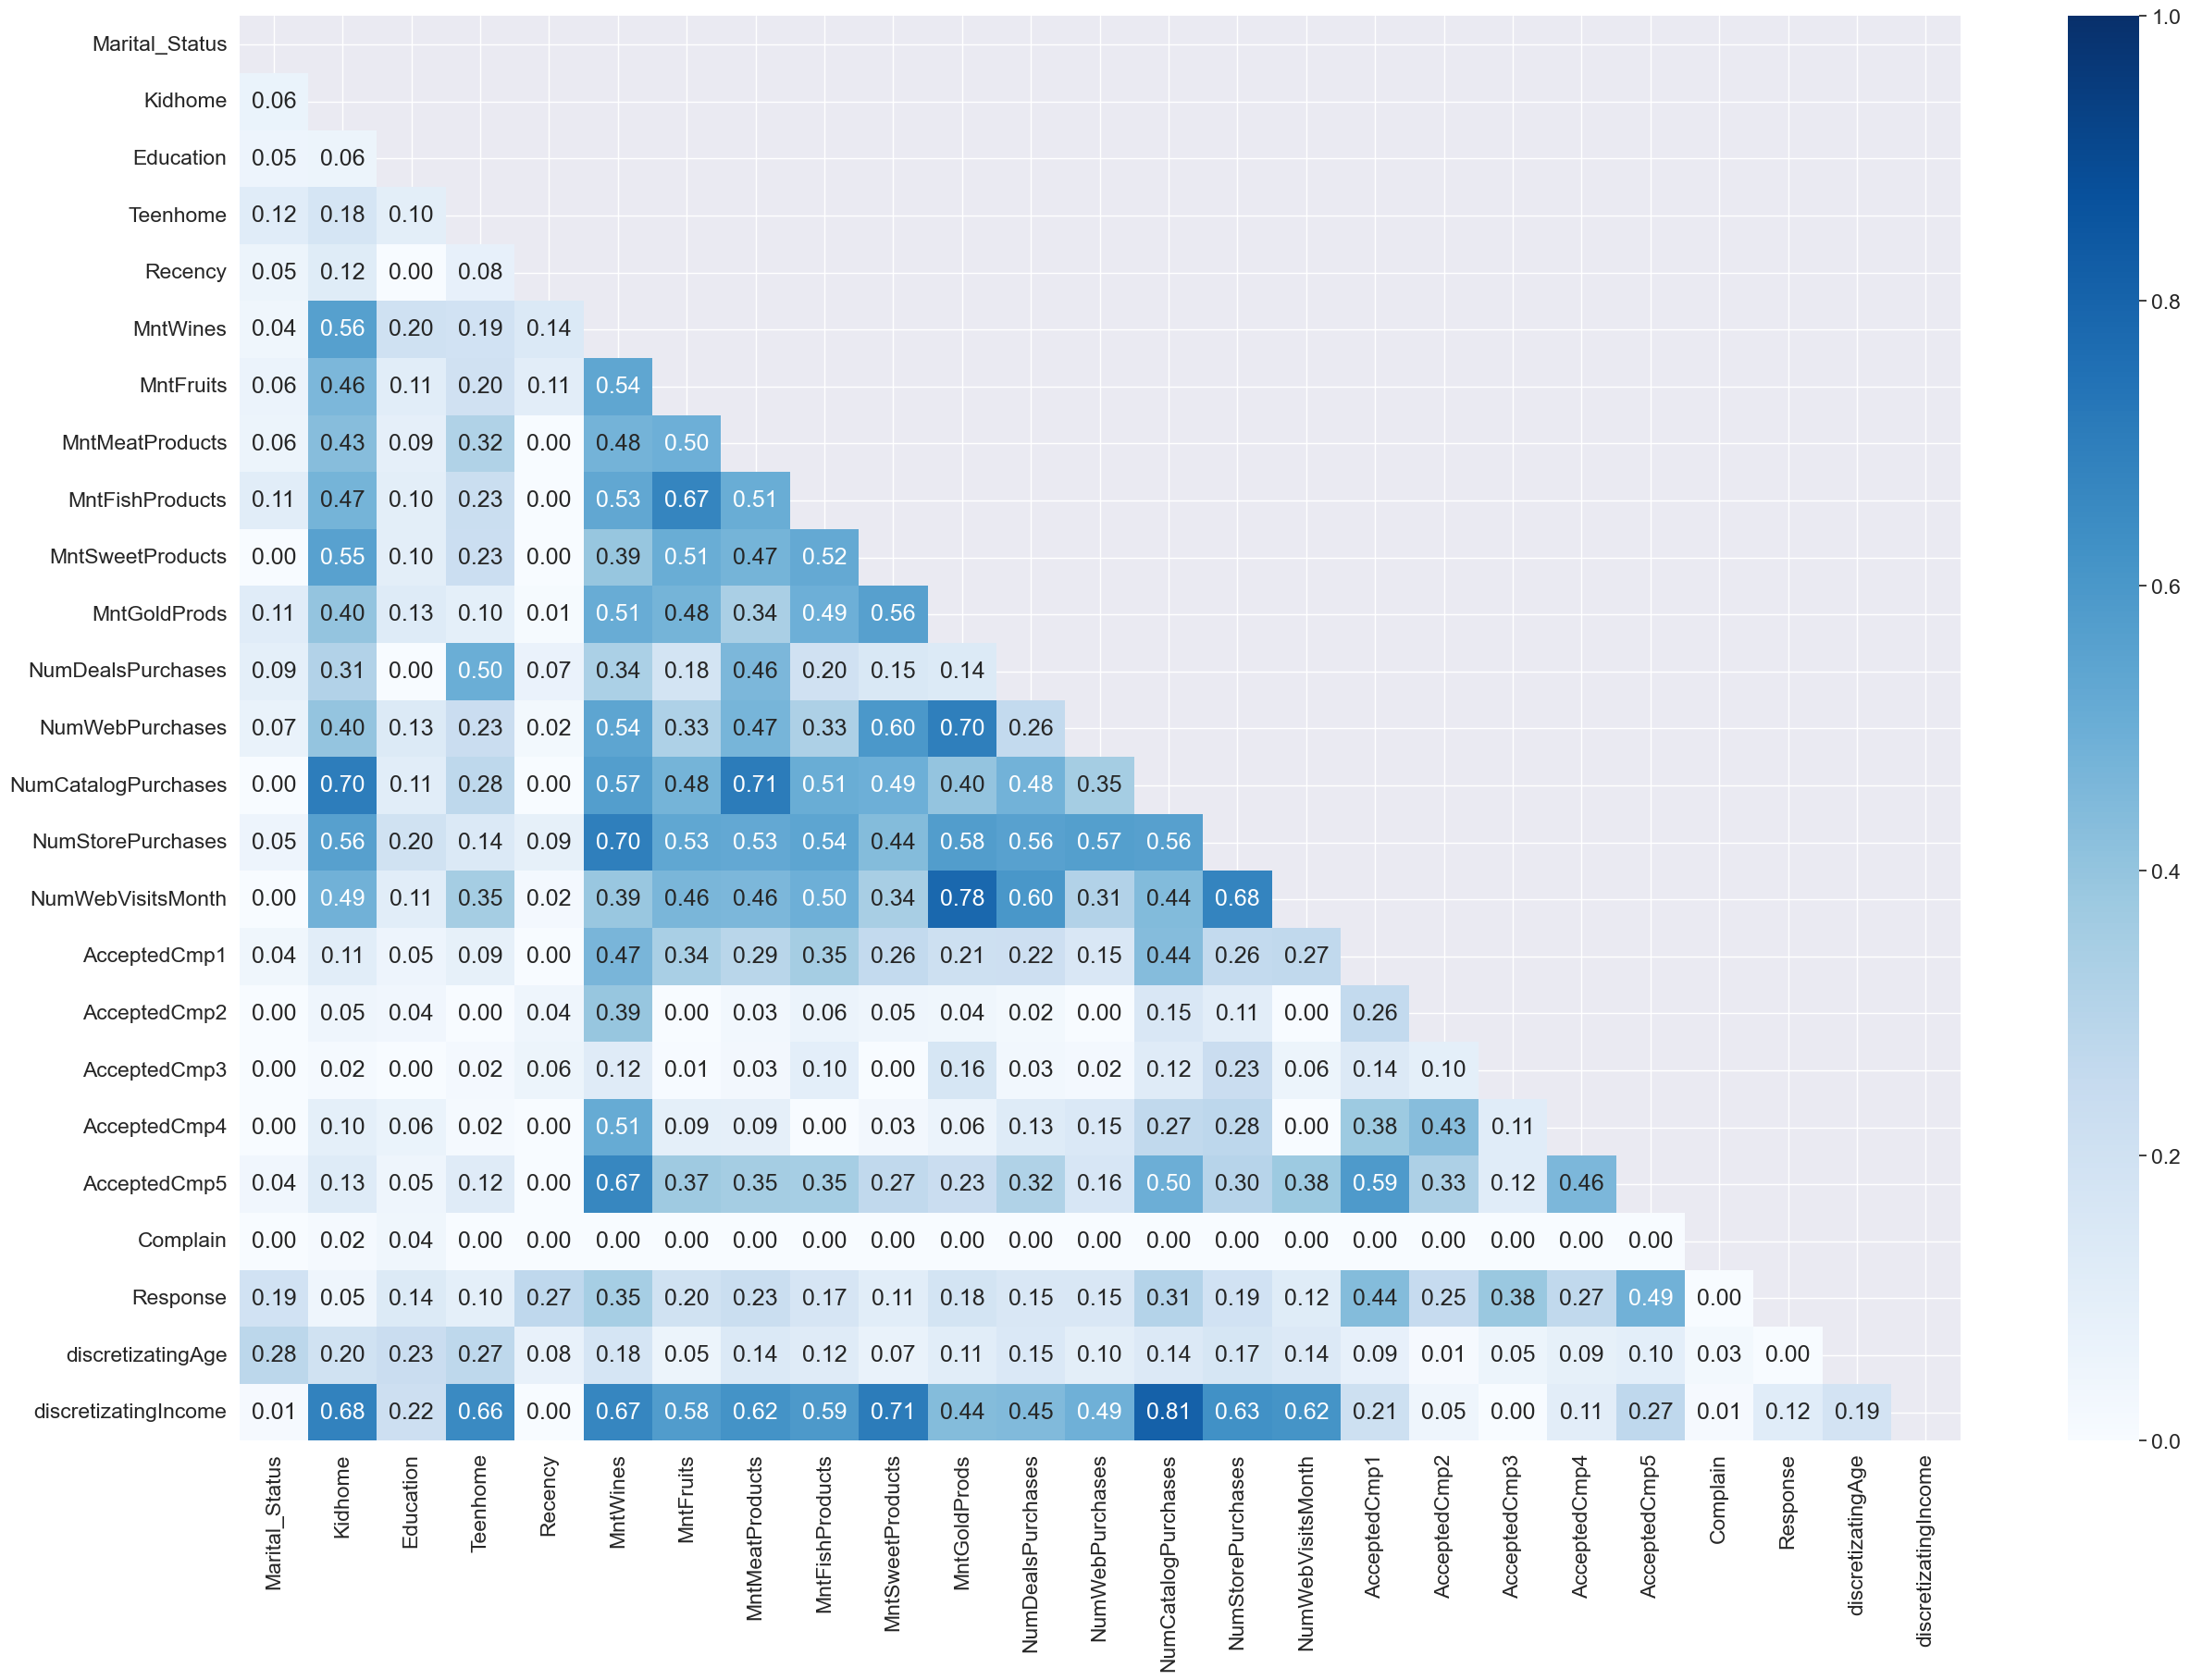

interval columns not set, guessing: ['Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']


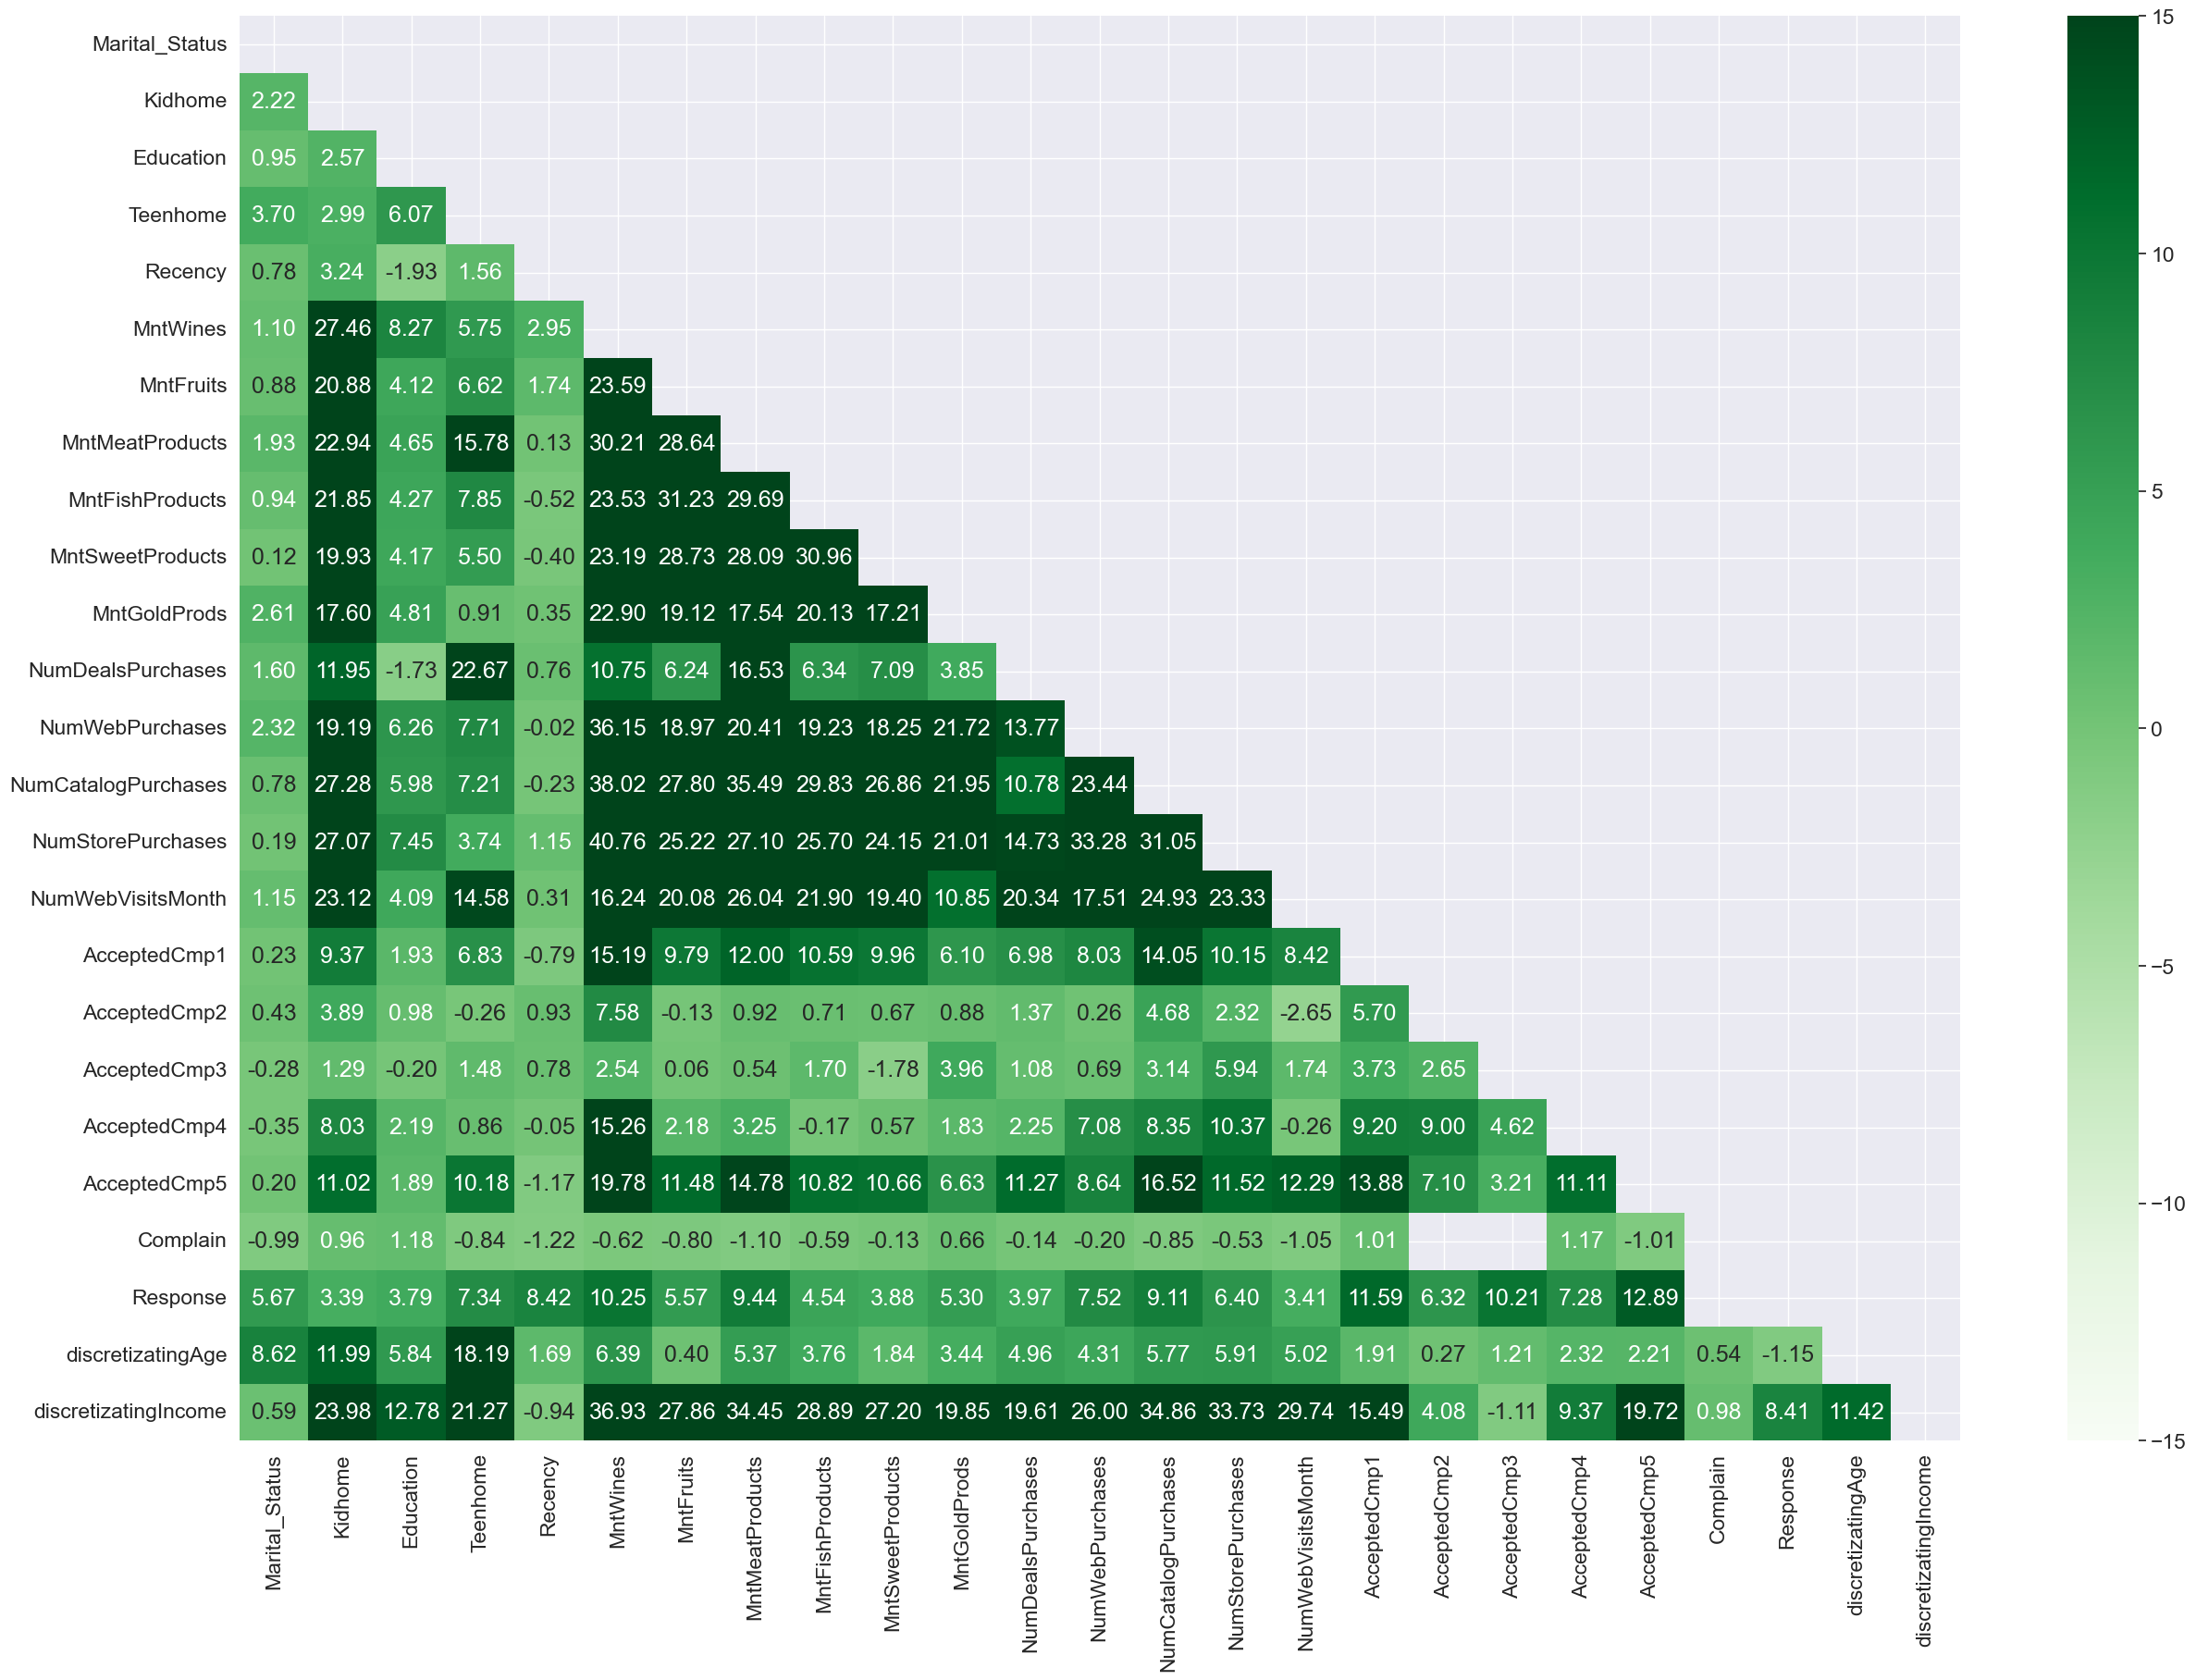

<Figure size 640x480 with 0 Axes>

In [68]:
dftest = df[['Marital_Status', 'Kidhome','Education', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'discretizatingAge', 'discretizatingIncome']]
# heatmap of variable correlation 
fig, ax = plt.subplots(num= 15, figsize=(30, 20))
phik_overview = dftest.phik_matrix()
corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))
sns.heatmap(phik_overview, mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="Blues", fmt='.2f')
sns.set(font_scale=1.5)
plt.show()

# heatmap of variable significance
fig, ax = plt.subplots(num= 15, figsize=(30, 20))
significance_overview = dftest.significance_matrix()
corr_mask = np.triu(np.ones_like(significance_overview, dtype=bool))
sns.heatmap(significance_overview, mask=corr_mask, vmin=-15, vmax=15, annot=True, cmap="Greens", fmt='.2f')
sns.set(font_scale=1.5)
plt.show()


plt.tight_layout()


In [69]:
7/12*100

58.333333333333336

In [70]:
# df[df['NumWebPurchases']].groupby(['discretizatingIncome']).agg('count')
dftest = df[['NumWebVisitsMonth', 'NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'discretizatingAge', 'Education', 'discretizatingIncome']]

table = pd.pivot_table(dftest, index=['discretizatingAge', 'discretizatingIncome'],
                       columns=['NumWebPurchases'], aggfunc=np.sum)
table

Education   
NumWebPurchases                                                                               0    
discretizatingAge        discretizatingIncome                                                      
Among young              $0 - $34948.5                                                Graduation  \
                         $34948.5 - $67793.5                                                 NaN   
                         > $67793.5                                                          NaN   
Early middle-aged adults $0 - $34948.5         GraduationMasterMasterGraduationGraduationGrad...   
                         $34948.5 - $67793.5   GraduationMasterGraduationGraduationMasterMast...   
                         > $67793.5                                   PhDGraduationPhDGraduation   
Late middle-aged adults  $0 - $34948.5         GraduationGraduationMasterGraduationGraduation...   
                         $34948.5 - $67793.5                    GraduationMasterGraduationMaster   
                         > $67793.5                                                          PhD   
Older Adults             $0 - $34948.5               GraduationGraduationPhDGraduationGraduation   
                         $34948.5 - $67793.5                                           PhDPhDPhD   
                         > $67793.5                                                          PhD   

                                                                                                   
NumWebPurchases                                                                               1    
discretizatingAge        discretizatingIncome                                                      
Among young              $0 - $34948.5         PhDGraduationMasterGraduationGraduationGraduat...  \
                         $34948.5 - $67793.5                                          Graduation   
                         > $67793.5                                                          NaN   
Early middle-aged adults $0 - $34948.5         GraduationGraduationBasicMasterGraduationBasic...   
                         $34948.5 - $67793.5   GraduationGraduationGraduationMasterMasterPhDM...   
                         > $67793.5                                                          NaN   
Late middle-aged adults  $0 - $34948.5         GraduationGraduationGraduationGraduationMaster...   
                         $34948.5 - $67793.5   GraduationMasterPhDPhDGraduationPhDMasterGradu...   
                         > $67793.5                                                       Master   
Older Adults             $0 - $34948.5         PhDMasterGraduationGraduationGraduationMasterG...   
                         $34948.5 - $67793.5   GraduationMasterPhDPhDGraduationMasterMasterPh...   
                         > $67793.5                                                          PhD   

                                                                                                   
NumWebPurchases                                                                               2    
discretizatingAge        discretizatingIncome                                                      
Among young              $0 - $34948.5         GraduationMasterGraduationBasicGraduationGradu...  \
                         $34948.5 - $67793.5            GraduationGraduationGraduationGraduation   
                         > $67793.5                               GraduationGraduationGraduation   
Early middle-aged adults $0 - $34948.5         GraduationBasicMasterMasterMasterGraduationGra...   
                         $34948.5 - $67793.5   GraduationMasterPhDGraduationGraduationPhDGrad...   
                         > $67793.5            GraduationGraduationGraduationMasterGraduation...   
Late middle-aged adults  $0 - $34948.5         GraduationPhDGraduationMasterPhDBasicGraduatio...   
                         $34948.5 - $67793.5   MasterGraduationGraduationMasterGradua

In [71]:
df['MntWines']

0       635
1        11
2       426
3        11
4       173
       ... 
2235     71
2236    161
2237    264
2238    532
2239     32
Name: MntWines, Length: 2240, dtype: int64

In [72]:
a = pd.crosstab(df.discretizatingAge, df.discretizatingIncome)
a


discretizatingIncome,$0 - $34948.5,$34948.5 - $67793.5,> $67793.5
discretizatingAge,,,
Among young,40,18,33
Early middle-aged adults,265,321,170
Late middle-aged adults,188,476,210
Older Adults,54,305,160


In [73]:
Pa = (a.loc['Among young'].values.sum()/len(df))
Pba = (40/2240)/(Pa)

Prob = Pa*Pba
Prob*2240

40.0

In [74]:
def ExpectatedVals(a, x, y):
    sumRows = a[x].values.sum()
    sumCols = a.loc[y].values.sum()
    
    return sumRows, sumCols
    

In [75]:
Pa = (a.loc['Among young'].values.sum()/len(df))
Pb = (a['$0 - $34948.5'].values.sum()/len(df))
PAnB = Pa*Pb 
# peluang Among young berpenghasilan 0-34948.5
prob1 = Pa*((PAnB)/Pa)
prob1

0.009920479910714286

In [76]:
df

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campignAccept,discretizatingAge,discretizatingIncome
0,5524,1957,Graduation,66,Single,58138.0,0,0,2012-09-04,58,...,0,0,0,0,0,0,1,Accepted once or more,Older Adults,$34948.5 - $67793.5
1,2174,1954,Graduation,69,Single,46344.0,1,1,2014-03-08,38,...,0,0,0,0,0,0,0,Never Accepted,Older Adults,$34948.5 - $67793.5
2,4141,1965,Graduation,58,Together,71613.0,0,0,2013-08-21,26,...,0,0,0,0,0,0,0,Never Accepted,Late middle-aged adults,> $67793.5
3,6182,1984,Graduation,39,Together,26646.0,1,0,2014-02-10,26,...,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults,$0 - $34948.5
4,5324,1981,PhD,42,Married,58293.0,1,0,2014-01-19,94,...,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults,$34948.5 - $67793.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,5079,1971,Graduation,52,Married,42075.5,1,1,2013-03-03,82,...,0,0,0,0,0,0,0,Never Accepted,Late middle-aged adults,$34948.5 - $67793.5
2236,10339,1954,Master,69,Together,52884.5,0,1,2013-06-23,83,...,0,0,0,0,0,0,0,Never Accepted,Older Adults,$34948.5 - $67793.5
2237,3117,1955,Graduation,68,Single,59925.0,0,1,2013-10-18,95,...,0,0,0,0,0,0,0,Never Accepted,Older Adults,$34948.5 - $67793.5
2238,5250,1943,Master,80,Widow,71335.5,0,0,2013-10-30,75,...,0,0,1,0,0,0,1,Accepted once or more,Older Adults,> $67793.5


In [77]:
df.loc[(df.discretizatingIncome == '$0 - $34948.5') & (df.discretizatingAge == 'Among young')]

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campignAccept,discretizatingAge,discretizatingIncome
28,6864,1989,Master,34,Divorced,10979.0,0,0,2014-05-22,34,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
43,9909,1996,Master,27,Married,7500.0,0,0,2012-11-09,24,...,0,0,0,0,0,0,1,Accepted once or more,Among young,$0 - $34948.5
318,663,1989,PhD,34,Single,33996.0,0,0,2013-09-11,46,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
364,4459,1989,Graduation,34,Single,30279.0,1,0,2012-12-30,13,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
415,5987,1989,Master,34,Together,10404.0,1,0,2014-05-04,52,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
427,5012,1989,Graduation,34,Married,28691.0,1,0,2013-07-04,56,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
430,10642,1989,Graduation,34,Single,30279.0,1,0,2012-12-30,13,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
489,8151,1990,Basic,33,Married,24279.0,0,0,2012-12-29,6,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
495,3386,1992,Graduation,31,Married,34935.0,0,0,2013-06-21,71,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
504,10203,1990,Graduation,33,Single,26095.0,1,0,2013-06-30,77,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5


In [78]:
40/2240

0.017857142857142856

In [79]:
y = a['$0 - $34948.5'].values.sum()
y

547

In [80]:
a.loc['Among young'].values.sum()

91

In [81]:
probx = (40/a.loc['Among young'].values.sum())*(40/a['$0 - $34948.5'].values.sum())
probx*2240

72.0011250175784

In [82]:
Pa = (a.loc['Among young'].values.sum()/len(df))
Pb = (a['$0 - $34948.5'].values.sum()/len(df))
# peluang Among young berpenghasilan 0-34948.5
prob1 = Pa*(Pb*Pa/Pa)
prob1

# peluang Among young berpenghasilan $34948.5 - $67793.5
# prob2 = (a.loc['Among young'].values.sum()/len(df))*(a['$0 - $34948.5'].values.sum()/len(df))
# prob2

0.009920479910714286

In [83]:
pd.set_option('display.max_rows', 500)
table = pd.pivot_table(dftest, index=['discretizatingAge', 'discretizatingIncome', 'Education'], values= ['MntWines','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'],
                       aggfunc='sum').sort_values(by= 'MntWines', ascending = False)
table

KeyError: 'MntWines'

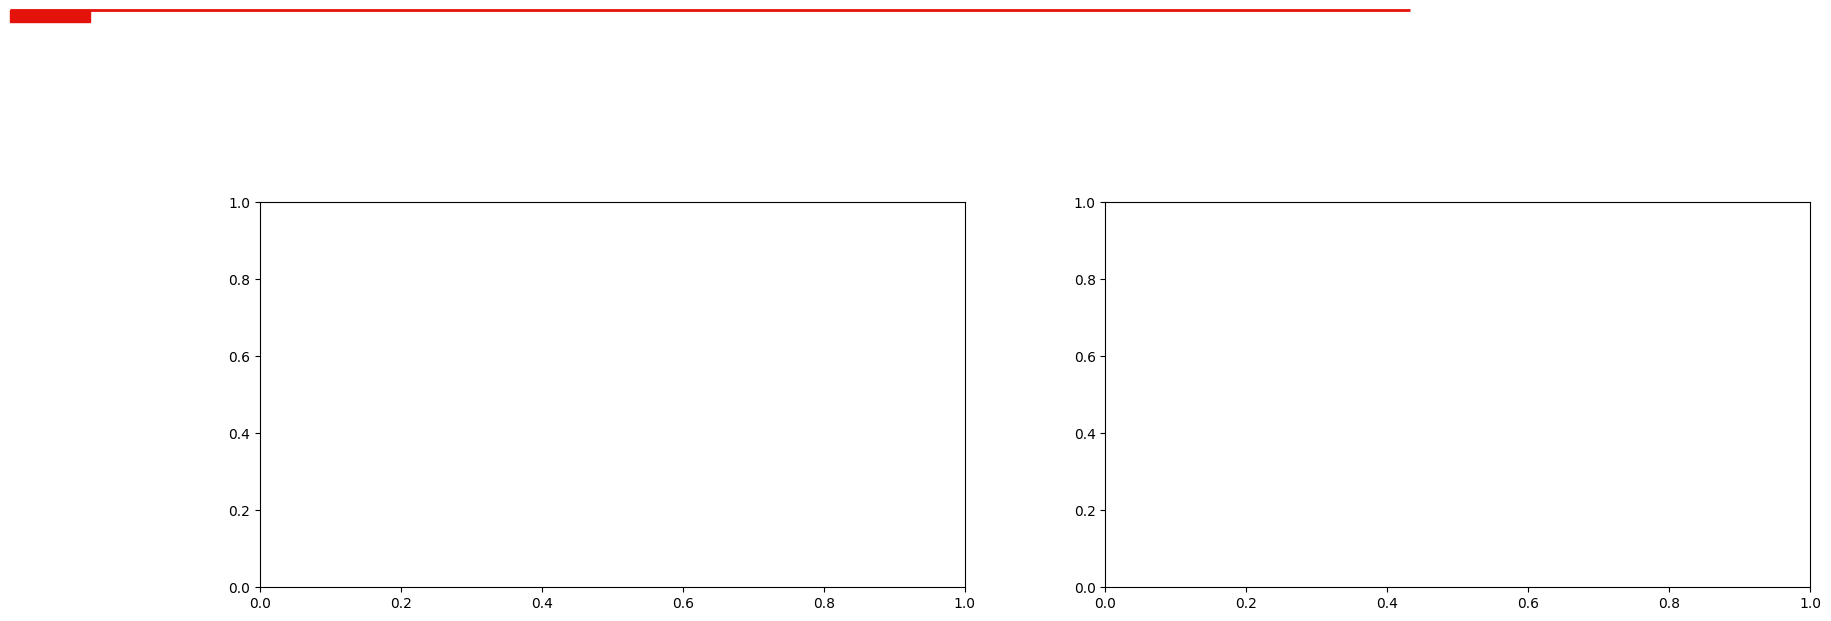

In [ ]:
# Inisialisasi parameter gambar
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.7], [1.265, 1.265], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.24), 0.04, 0.025, color='#E3120B'))